In [2]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Datasets y Preprocesamiento
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Modelo y Métricas
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configuración de gráficos
plt.style.use('ggplot')
%matplotlib inline

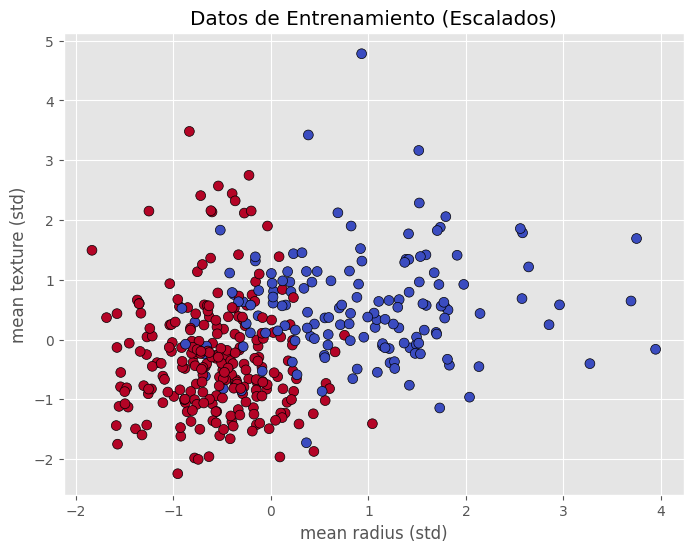

In [3]:
# 1. Cargar datos
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # Tomamos solo las 2 primeras columnas para visualizar en 2D
y = cancer.target       # 0: Maligno, 1: Benigno

# 2. Dividir en entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Escalar los datos (Muy importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualización de los datos de entrenamiento
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.title('Datos de Entrenamiento (Escalados)')
plt.xlabel(cancer.feature_names[0] + " (std)")
plt.ylabel(cancer.feature_names[1] + " (std)")
plt.show()

In [4]:
def plot_decision_boundary(model, X, y, title="SVM Decision Boundary"):
    # Crear una malla (meshgrid) para graficar
    h = .02  # Paso de la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predecir para cada punto de la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar contornos y puntos
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
    plt.xlabel('Mean Radius (Escalado)')
    plt.ylabel('Mean Texture (Escalado)')
    plt.title(title)
    plt.show()

# SVM Lineal

Precisión del SVM Lineal: 0.9006


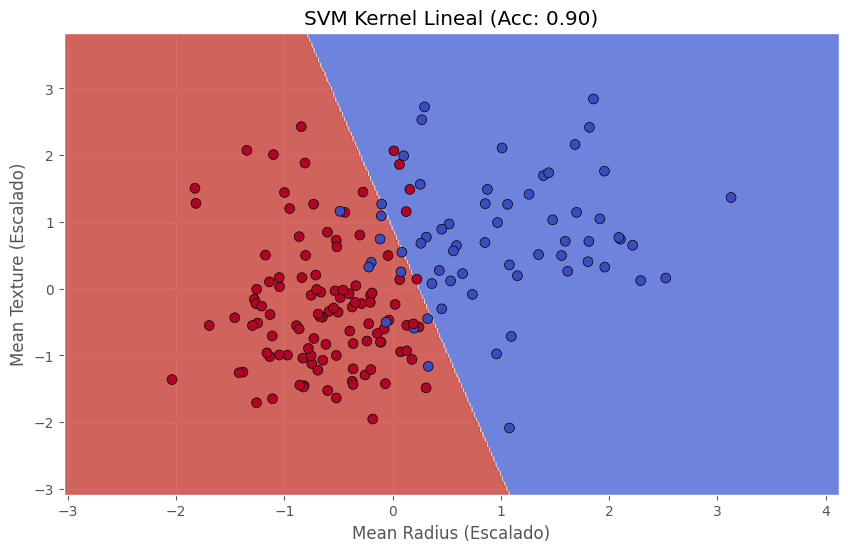

In [5]:
# Crear y entrenar modelo SVM Lineal
# C=1.0 es el parámetro de regularización por defecto
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lin = svm_linear.predict(X_test_scaled)
acc_lin = accuracy_score(y_test, y_pred_lin)

print(f"Precisión del SVM Lineal: {acc_lin:.4f}")

# Graficar
plot_decision_boundary(svm_linear, X_test_scaled, y_test, title=f"SVM Kernel Lineal (Acc: {acc_lin:.2f})")

# SVM Radial

Buscando mejores hiperparámetros para RBF...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Mejores parámetros encontrados: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Precisión del SVM Radial (Optimizado): 0.9064


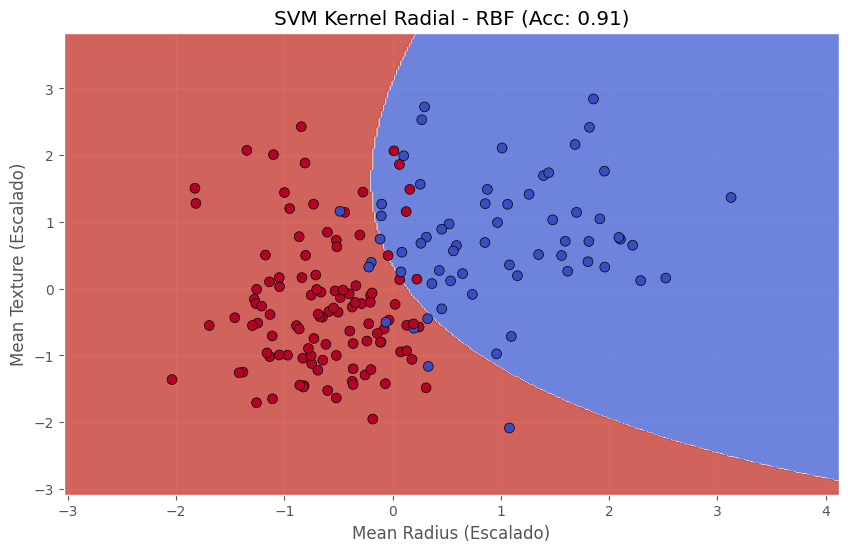

In [6]:
# Definir cuadrícula de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Configurar búsqueda por validación cruzada
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)

# Entrenar buscando los mejores parámetros
print("Buscando mejores hiperparámetros para RBF...")
grid.fit(X_train_scaled, y_train)

print(f"\nMejores parámetros encontrados: {grid.best_params_}")

# Usar el mejor modelo
svm_rbf_best = grid.best_estimator_

# Predicciones
y_pred_rbf = svm_rbf_best.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Precisión del SVM Radial (Optimizado): {acc_rbf:.4f}")

# Graficar
plot_decision_boundary(svm_rbf_best, X_test_scaled, y_test, title=f"SVM Kernel Radial - RBF (Acc: {acc_rbf:.2f})")

# Comparacion de resultados

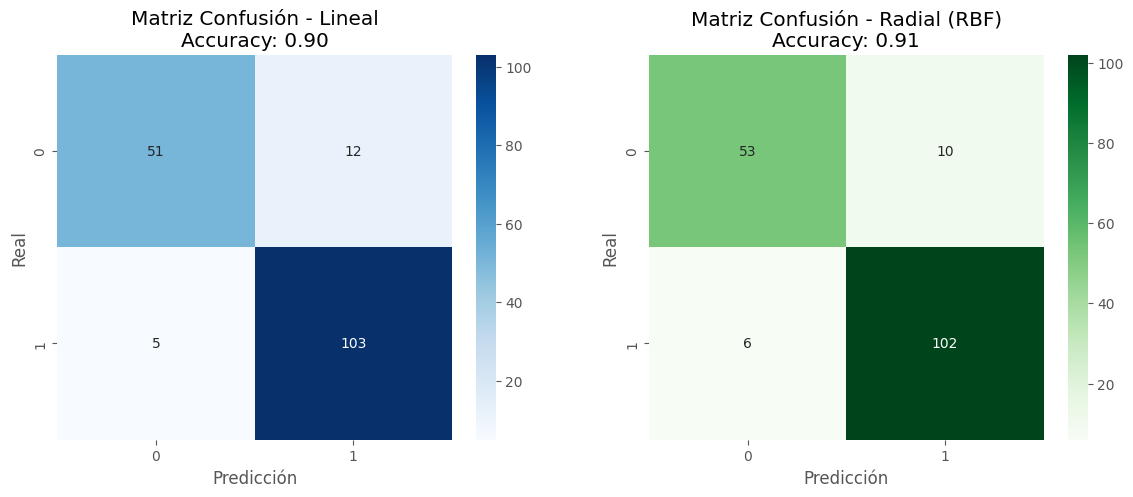

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz SVM Lineal
sns.heatmap(confusion_matrix(y_test, y_pred_lin), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Matriz Confusión - Lineal\nAccuracy: {acc_lin:.2f}')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Matriz SVM Radial
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Matriz Confusión - Radial (RBF)\nAccuracy: {acc_rbf:.2f}')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.show()